In [1]:
import scipy.stats as stats  

/Users/dwightpaganlugo/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import scipy

In [3]:
version = scipy.version.version

print(version)

1.7.3




## Exploratory Data Analysis

1) Do the users spend more time on the new landing page than the old landing page?

2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3) Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4) Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.



# # Data Dictionary:

user_id - This represents the user ID of the person visiting the website.

group - This represents whether the user belongs to the first group (control) or the second group (treatment).

landing_page - This represents whether the landing page is new or old.

time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

converted - This represents whether the user gets converted to a subscriber of the news portal or not.

language_preferred - This represents the language chosen by the user to view the landing page.

In [4]:
# library used for analysis and manipulate data
import pandas as pd  

# this library is used to work with arrays
import numpy as np  

#Library for statistical and probability functions
import scipy.stats as stats  

#Library for our visualizations
import matplotlib.pyplot as plt  

#Library to make visualizations look crisp and nice
import seaborn as sns  

%matplotlib inline



In [5]:
enews = pd.read_csv('abtest.csv')

In [6]:
#query to import and read our data file


enews.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [7]:
enews.shape #checking shape of data

(100, 6)

#### We have a hundred rows and 6 columns of data.

In [8]:
enews.info() #check information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
#description of data
enews.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [10]:
# we check for missing values
enews.isnull().sum()


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values.

### Question: Do the users spend more time on the new landing page than the old landing page?

## Hypothesis testing

#significance level
a = 0.05 

u1 = enews_new landing page

u2 = enews_old landing page

H0: u1 = u2 Null hipotesis says the time spent by users on the new page is equal to the time spent by users on the old page.
Ha: u1 > u2  Alternative hipotesis, Time spent by users on the new landing page is greater than time spent by users on the old page.


In [11]:
#new table showing only users from old landing page
enews_old = enews[enews.landing_page=="old"]
print(enews_old)

    user_id    group landing_page  time_spent_on_the_page converted  \
0    546592  control          old                    3.48        no   
3    546567  control          old                    3.02        no   
5    546558  control          old                    5.28       yes   
7    546581  control          old                    6.53       yes   
9    546548  control          old                    2.08        no   
10   546588  control          old                    6.21       yes   
11   546546  control          old                    2.58       yes   
14   546578  control          old                    8.72       yes   
17   546555  control          old                    0.40        no   
18   546493  control          old                   10.30       yes   
19   546549  control          old                    3.88       yes   
20   546560  control          old                    2.66        no   
21   546584  control          old                    7.03       yes   
27   5

In [12]:
#checking mean of the time spent on the old page
enews_old = enews[enews.landing_page=="old"]
print(enews_old.time_spent_on_the_page.mean())

4.532400000000001


In [13]:
#new table showing only users from old landing page
enews_new = enews[enews.landing_page=="new"]
print(enews_new)

    user_id      group landing_page  time_spent_on_the_page converted  \
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
4    546459  treatment          new                    4.75       yes   
6    546448  treatment          new                    5.25       yes   
8    546461  treatment          new                   10.71       yes   
12   546491  treatment          new                    5.86       yes   
13   546478  treatment          new                    6.03       yes   
15   546466  treatment          new                    6.27       yes   
16   546443  treatment          new                    8.73        no   
22   546450  treatment          new                    3.65        no   
23   546475  treatment          new                    7.02       yes   
24   546456  treatment          new                    6.18        no   
25   546455  treatment          new                

In [14]:
#checking mean of the time spent on the old page
enews_new = enews[enews.landing_page=="new"]
print(enews_new.time_spent_on_the_page.mean())

6.2232


In [15]:
#Performing a two sample t-test to get the p_value

t, p = stats.ttest_ind(enews_new.time_spent_on_the_page, enews_old.time_spent_on_the_page, equal_var=False, alternative='greater')

print('The p-value is' , p)



The p-value is 0.0001392381225166549


## Conclusion


### The p-value = 0.0001392381225166549 < 0.05 (alpha), we reject the null hypothesis. and this shows that the means of the time spent by users on the new landing page is greater than the mean of time spent by users on the old landing page. It appears that the new landing page gathers more new subscribers.

<AxesSubplot:>

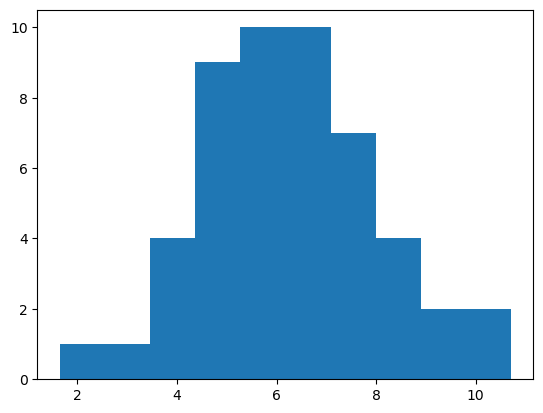

In [16]:
#visualisation of mean of time speant on new landing page
enews_new.time_spent_on_the_page.hist(grid=False)


Text(0, 0.5, 'Users')

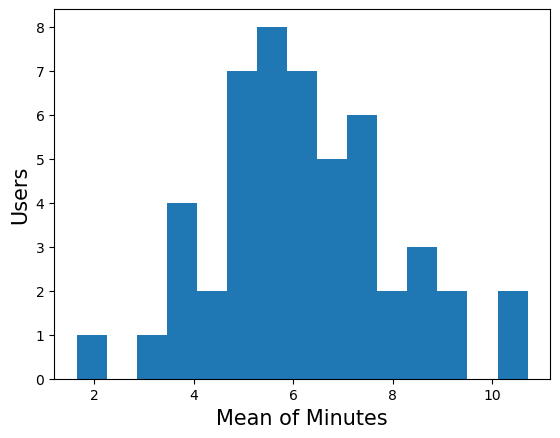

In [17]:
#visualisation of mean of time speant on new landing page
enews_new['time_spent_on_the_page'].hist(bins=15,grid=False)
plt.xlabel("Mean of Minutes", fontsize=15)
plt.ylabel("Users",fontsize=15)


/var/folders/k8/0ll2n6td7zldq05j4vwlwd1m0000gn/T/ipykernel_12486/1616325004.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(enews_new['time_spent_on_the_page'], kde=True, color='red', bins=15)


<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

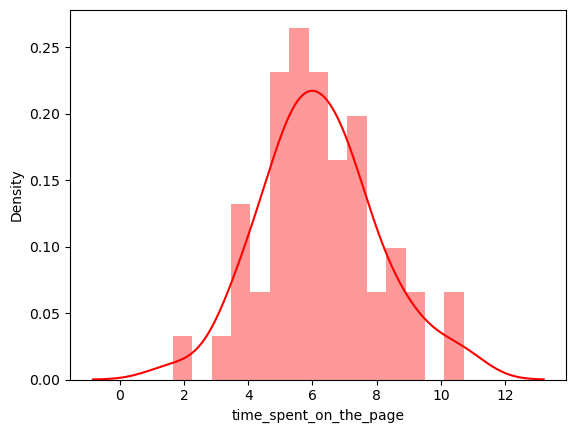

In [18]:

#visualisation of mean of time speant on new landing page
sns.distplot(enews_new['time_spent_on_the_page'], kde=True, color='red', bins=15)

### The new landing page shows a normal distribution with the density or concentration of values being betwwen 4 and 8 and the mean being around 6.


<AxesSubplot:>

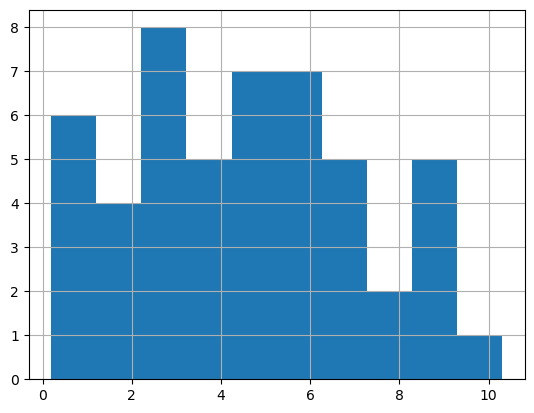

In [19]:
 enews_old.time_spent_on_the_page.hist()

### The mean time speant on the  old landing page visualization  has an uniform distribution.

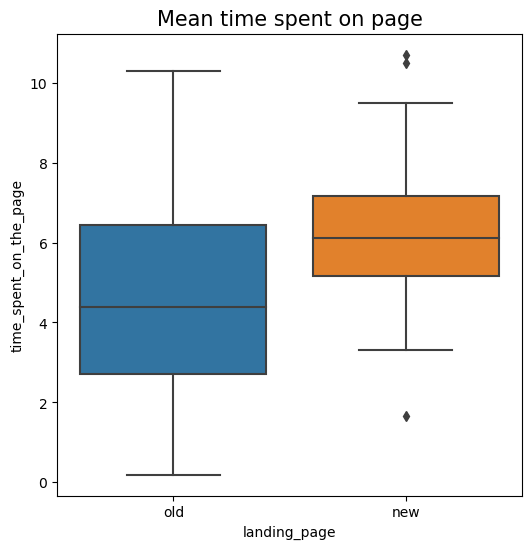

In [20]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "landing_page", y = 'time_spent_on_the_page' , data = enews)
a.set_title("Mean time spent on page", fontsize=15)
plt.show()

## Question: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

H0: u1 = u2

H1: u1 =! u2



In [21]:
#Number of converted subscribers ('yes') to old landing page
sum(enews_old.converted=='yes')

21

In [22]:
pd.crosstab(enews.language_preferred, enews.converted)

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [23]:
#Number of converted subscribers ('yes') to new landing page
sum(enews_new.converted=='yes')

33

In [24]:
#we use a z test for proportions 
from statsmodels.stats.proportion import proportions_ztest
count = np.array([21, 33])
nobs = np.array([50, 50])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.016


## Conclusion
 P-value 0.016 > 0.05 significance level,  we reject the Null hypotesis. The converstion rate for the new page is stastistically significantly higher than the old page.





## Does the converted status depend on the preferred language? 

H0: converted status independence of the preferred language

Ha:  converted status not independent of the preferred language
    


In [25]:
# creating a table name for our contingency table so we can use it in the degrees of freedom function and chi-square function.
obd = pd.crosstab(enews.language_preferred, enews.converted)

In [26]:
#degrees of freedom function
dof = obd.size - sum(obd.shape) + obd.ndim - 1
print(dof)

2


In [27]:
# chi-square funtion gives us chi test statistic, p-value, dof, and frequencies for our array.
stats.chi2_contingency(obd)

(3.0930306905370832,
 0.2129888748754345,
 2,
 array([[14.72, 17.28],
        [15.64, 18.36],
        [15.64, 18.36]]))

## Conclusion
 P-value = 0.2129 which is greater than our significance level of 0.05, in which case we fail to reject our null hypotesis. 

 ## Question:  Is the mean time spent on the new page same for the different language users?
 
 Hypotesis:
 
Ho: u1 = u2 = u3

Ha: at least one mean of the time spent on the new page is the same for the different language users.

In [28]:

enews_new = enews[enews.landing_page=="new"]
print(enews_new)



    user_id      group landing_page  time_spent_on_the_page converted  \
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
4    546459  treatment          new                    4.75       yes   
6    546448  treatment          new                    5.25       yes   
8    546461  treatment          new                   10.71       yes   
12   546491  treatment          new                    5.86       yes   
13   546478  treatment          new                    6.03       yes   
15   546466  treatment          new                    6.27       yes   
16   546443  treatment          new                    8.73        no   
22   546450  treatment          new                    3.65        no   
23   546475  treatment          new                    7.02       yes   
24   546456  treatment          new                    6.18        no   
25   546455  treatment          new                

In [29]:
enews_new.groupby('language_preferred').mean()

,user_id,time_spent_on_the_page
language_preferred,,
English,546461.875000,6.663750
French,546466.647059,6.196471
Spanish,546473.647059,5.835294


In [30]:
enews.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [31]:

enews.loc[enews['landing_page']=='new'].loc[:,['language_preferred','time_spent_on_the_page']]

,language_preferred,time_spent_on_the_page
1,English,7.13
2,Spanish,4.40
4,Spanish,4.75
6,French,5.25
8,French,10.71
12,Spanish,5.86
13,French,6.03
15,Spanish,6.27
16,English,8.73
22,English,3.65


In [32]:
#means of time speant on the page by users preferred language
enews.loc[enews['landing_page']=='new'].loc[:,['language_preferred','time_spent_on_the_page']].groupby('language_preferred').mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


In [33]:
#importing package from scipy.stats to perform oneway anova test
from scipy.stats import f_oneway

In [34]:
#Oneway-ANOVA test function

test_stat, p_value = f_oneway(enews.loc[enews['language_preferred'] == 'English', 'time_spent_on_the_page'],
                                        enews.loc[enews['language_preferred'] == 'French', 'time_spent_on_the_page'],
                                        enews.loc[enews['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is '  + str(p_value))

The p-value is 0.8665610536012648


# Conclusion:

P_Value is greater than 0.05 alpha, in which case we fail to reject the Null hypotesis.


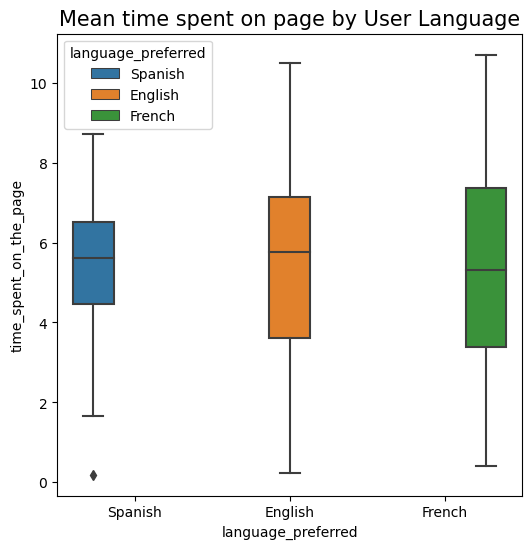

In [35]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = enews, hue = 'language_preferred')
a.set_title("Mean time spent on page by User Language", fontsize=15)
plt.show()

### The box plot does not seem to show there is a significant difference amongst the means of user languages.
